<a href="https://colab.research.google.com/github/kurrosan/DataAnalysis/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%A2%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8_%D0%98%D0%BD%D1%82%D0%B5%D0%BB_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler

In [19]:
data = pd.read_csv('/content/gdrive/MyDrive/Лабораторные работы/creditcard.csv')

In [20]:
# Подготовка данных
X = data.drop('Class', axis=1)  # Функции (признаки)
y = data['Class']  # Целевая переменная

In [21]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Создание модели Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [23]:
# Обучение модели
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Предсказание на тестовом наборе данных
y_pred = model.predict(X_test)


In [25]:
# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)#Здесь создается матрица ошибок
class_report = classification_report(y_test, y_pred)#Здесь создается отчет о классификации


In [26]:
# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.9995611109160493
Confusion Matrix:
[[56862     2]
 [   23    75]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [27]:
from sklearn.model_selection import GridSearchCV

# Задание сетки параметров для поиска
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Использование GridSearchCV для поиска оптимальных параметров
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print("Best Parameters:", grid_search.best_params_)

# Использование лучших параметров для обучения модели
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Best Parameters: {}


RandomForestClassifier(random_state=42)

In [28]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': best_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)

   feature  importance
17     V17    0.157526
12     V12    0.134800
14     V14    0.124608
10     V10    0.081166
16     V16    0.074635
11     V11    0.057927
9       V9    0.034041
7       V7    0.029772
18     V18    0.028322
4       V4    0.026813
21     V21    0.018452
3       V3    0.017194
26     V26    0.017114
2       V2    0.014254
20     V20    0.014003
1       V1    0.013598
19     V19    0.013545
6       V6    0.012791
29  Amount    0.012721
8       V8    0.012556
15     V15    0.012203
0     Time    0.011629
5       V5    0.011041
22     V22    0.010928
27     V27    0.010803
24     V24    0.010626
28     V28    0.010427
13     V13    0.009855
25     V25    0.008379
23     V23    0.008271


In [29]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')

Cross-Validation Scores: [0.99949527 0.99945138 0.99947333 0.99956111 0.99960499]
Mean CV Accuracy: 0.9995172156509907


In [30]:
from imblearn.over_sampling import RandomOverSampler

# Пример использования RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Обучение модели на увеличенном датасете
best_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

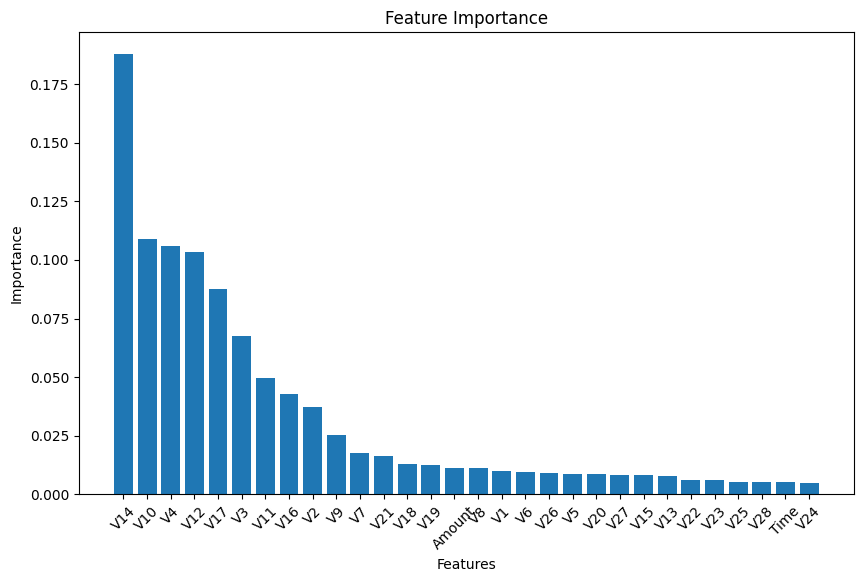

In [31]:
import matplotlib.pyplot as plt
import numpy as np


# Вывод важности признаков
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': best_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances['importance'], align='center')
plt.xticks(range(len(feature_importances)), feature_importances['feature'], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()